## Analyzing team composition ##

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [17]:
playerdata = pd.read_csv('data/Top5LeaguesPlayers_2223.csv', header=0, delimiter=',')
labels = pd.read_csv('data/Cluster_labels_2.csv', header=0, delimiter=',')
playerdata['Cluster'] = labels
leaguerank = pd.read_csv('data/Top5LeaguesStandings.csv', header=0, delimiter=',')
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7']

# Define the mapping of teams to leagues
league_mapping = {
    'Premier League': ['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Chelsea', 'Crystal Palace',
                       'Everton', 'Fulham', 'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City',
                       'Manchester Utd', "Nott'ham Forest", 'Newcastle Utd', 'Southampton', 'Tottenham', 'West Ham',
                       'Wolves'],
    'La Liga': ['Almería', 'Athletic Club', 'Atletico Madrid', 'Barcelona', 'Betis', 'Cádiz', 'Celta Vigo',
                'Elche', 'Espanyol', 'Getafe', 'Girona', 'Mallorca', 'Osasuna', 'Rayo Vallecano', 'Real Madrid',
                'Real Sociedad', 'Sevilla', 'Valencia', 'Valladolid', 'Villarreal'],
    'Bundesliga': ['Augsburg', 'Bayern Munich', 'Bochum', 'Borussia Dortmund', 'Eint Frankfurt', 'Freiburg', 'Hertha BSC',
                   'Hoffenheim', 'Köln', 'Leverkusen', 'Mainz 05', "M'Gladbach", 'RB Leipzig', 'Schalke 04', 'Stuttgart',
                   'Union Berlin', 'Werder Bremen', 'Wolfsburg'],
    'Serie A': ['Atalanta', 'Bologna', 'Cremonese', 'Empoli', 'Fiorentina', 'Inter', 'Juventus', 'Lazio', 'Lecce',
                'Milan', 'Monza', 'Napoli', 'Roma', 'Salernitana', 'Sampdoria', 'Sassuolo', 'Spezia', 'Torino',
                'Udinese', 'Hellas Verona'],
    'Ligue 1': ['Ajaccio', 'Angers', 'Auxerre', 'Brest', 'Clermont Foot', 'Lens', 'Lille', 'Lorient', 'Lyon', 'Marseille',
                'Monaco', 'Montpellier', 'Nantes', 'Nice', 'Paris S-G', 'Reims', 'Rennes', 'Strasbourg', 'Toulouse', 'Troyes']
}

# Reverse the mapping for easier assignment
team_to_league = {team: league for league, teams in league_mapping.items() for team in teams}

# Map each team in the dataset to its respective league
playerdata['League'] = playerdata['Squad'].map(team_to_league)

In [18]:
squad_cluster_counts = {}

for squad, num_players in playerdata['Squad'].value_counts().items():
    if num_players < 11:
        break  # Skip squads with fewer than 11 players

    # Initialize dictionary to hold counts of players in each cluster
    cluster_counts = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}

    # Filter the DataFrame for players in the current squad
    squad_players = playerdata[playerdata['Squad'] == squad]

    # Sort by 'Minutes' and select the top 11 players
    top_players = squad_players.sort_values(by='Min', ascending=False).head(11)

    # Count how many players are in each cluster and update the dictionary
    for cluster in top_players['Cluster']:
        cluster_counts[cluster] += 1
    squad_cluster_counts[squad] = cluster_counts
print(squad_cluster_counts)


{'RB Leipzig': {0: 6, 1: 4, 2: 0, 3: 1, 4: 0}, 'Leeds United': {0: 5, 1: 2, 2: 2, 3: 1, 4: 1}, 'Leverkusen': {0: 4, 1: 3, 2: 1, 3: 3, 4: 0}, 'Leicester City': {0: 4, 1: 1, 2: 4, 3: 1, 4: 1}, 'Bournemouth': {0: 3, 1: 3, 2: 1, 3: 3, 4: 1}, "Nott'ham Forest": {0: 2, 1: 0, 2: 2, 3: 0, 4: 7}, 'Reims': {0: 5, 1: 2, 2: 2, 3: 2, 4: 0}, 'Brest': {0: 6, 1: 2, 2: 0, 3: 2, 4: 1}, 'Spezia': {0: 5, 1: 1, 2: 2, 3: 2, 4: 1}, 'Southampton': {0: 5, 1: 1, 2: 3, 3: 1, 4: 1}, 'Troyes': {0: 1, 1: 5, 2: 1, 3: 2, 4: 2}, 'Liverpool': {0: 4, 1: 3, 2: 2, 3: 2, 4: 0}, 'Augsburg': {0: 3, 1: 2, 2: 2, 3: 1, 4: 3}, 'Mainz 05': {0: 4, 1: 1, 2: 2, 3: 0, 4: 4}, 'Elche': {0: 3, 1: 2, 2: 2, 3: 1, 4: 3}, 'Monza': {0: 3, 1: 3, 2: 2, 3: 3, 4: 0}, 'Brentford': {0: 4, 1: 2, 2: 2, 3: 1, 4: 2}, 'Valencia': {0: 3, 1: 3, 2: 3, 3: 1, 4: 1}, 'Manchester Utd': {0: 6, 1: 4, 2: 0, 3: 0, 4: 1}, 'Bochum': {0: 2, 1: 1, 2: 3, 3: 0, 4: 5}, 'Wolfsburg': {0: 3, 1: 2, 2: 3, 3: 3, 4: 0}, 'Lecce': {0: 3, 1: 2, 2: 3, 3: 0, 4: 3}, 'Everton': {0: 4

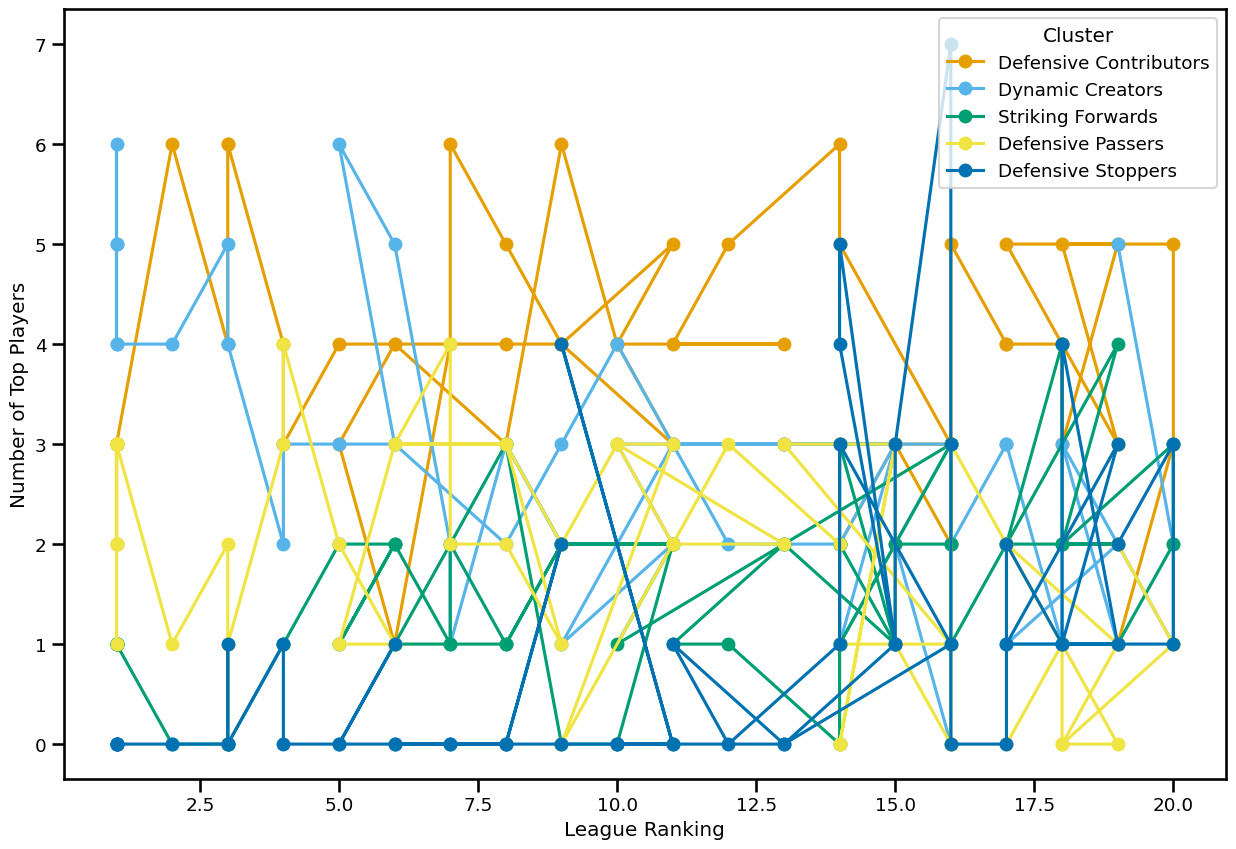

In [19]:
squad_clusters = pd.DataFrame.from_dict(squad_cluster_counts, orient='index').reset_index()
squad_clusters.rename(columns={'index': 'Squad'}, inplace=True)

leaguerank = leaguerank.merge(squad_clusters, how='inner', on='Squad')
# print(leaguerank)

cluster_titles = ['Defensive Contributors', 'Dynamic Creators', 'Striking Forwards', 'Defensive Passers', 'Defensive Stoppers']

# Prepare the figure
plt.figure(figsize=(15,10))

# Plotting each cluster
for i in range(5):
    # Plot with lines and markers, label for legend
    plt.plot(leaguerank['LgRk'], leaguerank[i], marker='o', linestyle='-', color=colors[i], label=cluster_titles[i])

# Adding legend
plt.legend(title='Cluster')

# Labeling axes
plt.xlabel('League Ranking')
plt.ylabel('Number of Top Players')

# Display the plot
plt.show()
plt.show()

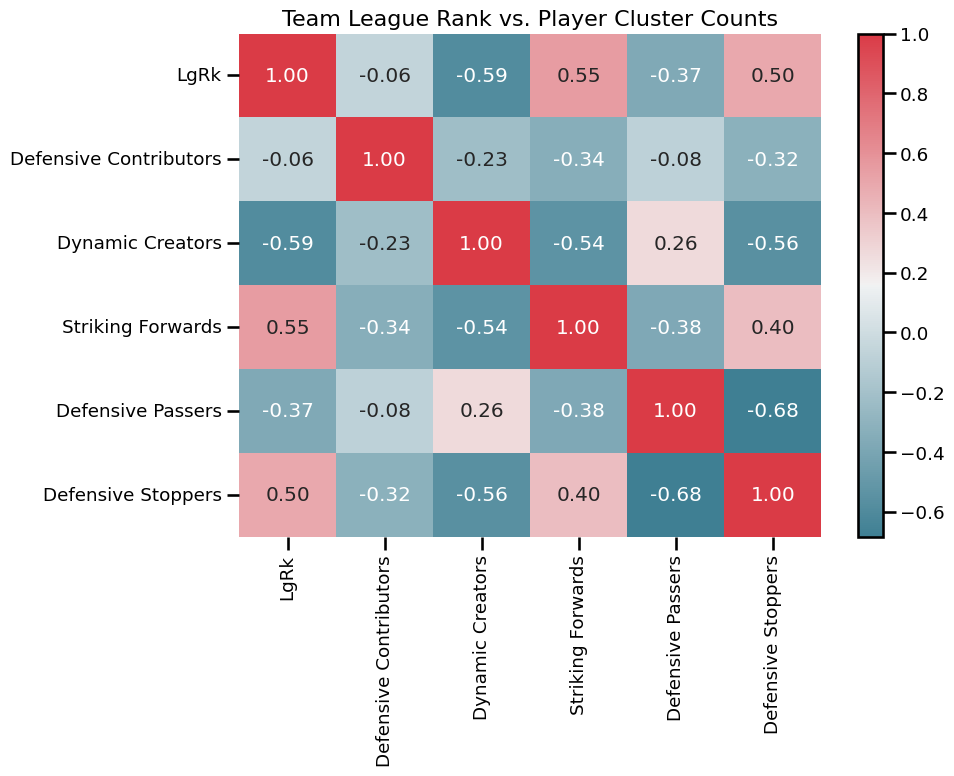

In [20]:
# Assuming 'leaguerank' DataFrame is already merged with cluster data
correlation_matrix = leaguerank[['LgRk', 0, 1, 2, 3, 4]].corr()
# Set the context for the plot for better readability
sns.set_context('talk', font_scale=0.8)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f",
            xticklabels=['LgRk', 'Defensive Contributors', 'Dynamic Creators', 'Striking Forwards', 'Defensive Passers', 'Defensive Stoppers'],
            yticklabels=['LgRk', 'Defensive Contributors', 'Dynamic Creators', 'Striking Forwards', 'Defensive Passers', 'Defensive Stoppers'],
            robust=True, ax=ax, cbar=False)

# Set the title with a specified font size for clarity
plt.title('Team League Rank vs. Player Cluster Counts', fontsize=16)

# Fix any overlap of labels
plt.tight_layout()

# Show the color bar for reference
ax.figure.colorbar(ax.collections[0])

# Show the plot
plt.show()


In [21]:
# Prepare independent variables (adding constant term for intercept)
X = leaguerank[[0, 1, 2, 3, 4]]
X = sm.add_constant(X)

# Dependent variable
y = leaguerank['LgRk']

# Fit regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   LgRk   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     10.17
Date:                Sat, 18 May 2024   Prob (F-statistic):           4.50e-06
Time:                        17:17:21   Log-Likelihood:                -156.25
No. Observations:                  54   AIC:                             322.5
Df Residuals:                      49   BIC:                             332.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5222      0.047     11.006      0.0

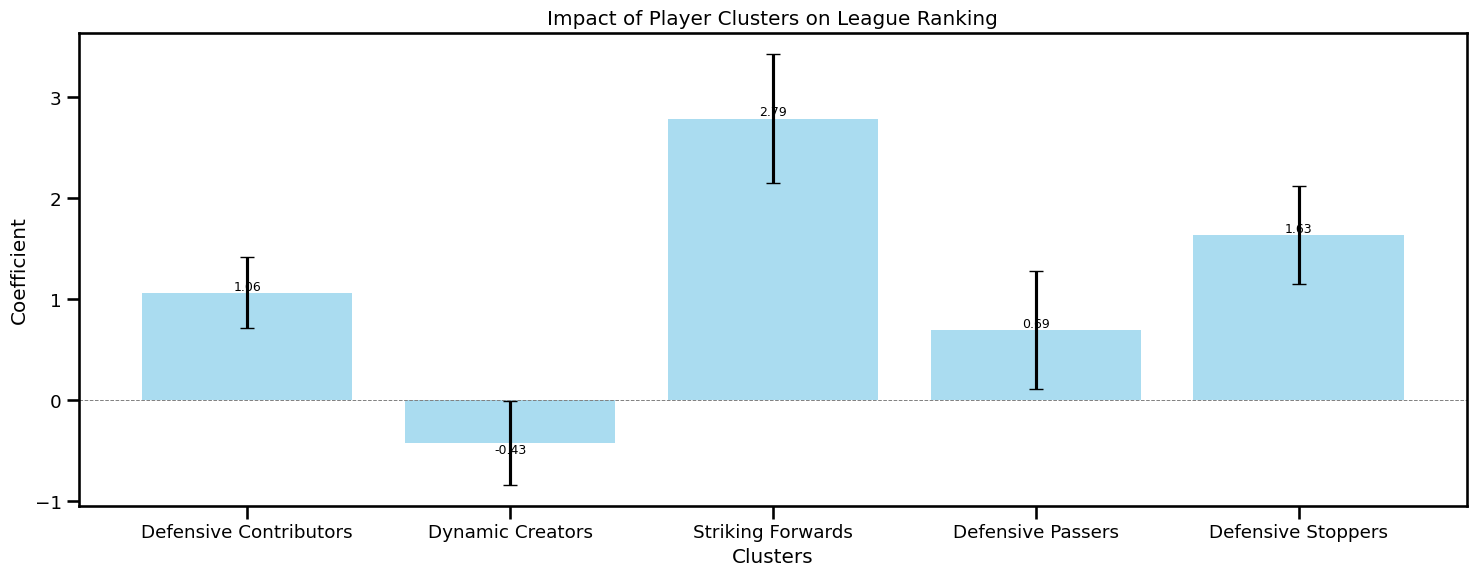

In [22]:
# Assuming 'model' is your fitted OLS model from statsmodels
coefficients = model.params[1:]  # exclude the intercept
errors = model.bse[1:]  # standard errors for each coefficient

# Create the plot
plt.figure(figsize=(15, 6))
plt.bar(range(len(coefficients)), coefficients, yerr=errors, color='skyblue', align='center', alpha=0.7, capsize=5)
plt.axhline(y=0, linestyle='--', color='grey', linewidth=0.7)

plt.xticks(range(len(coefficients)), cluster_titles)
plt.xlabel('Clusters')
plt.ylabel('Coefficient')
plt.title('Impact of Player Clusters on League Ranking')

# Adding the significance level on top of the bars
for i, coef in enumerate(coefficients):
    plt.text(i, coef, f"{coef:.2f}", ha='center', va='bottom' if coef > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()